In [ ]:
import pandas as pd
df = pd.read_csv('Market_Basket_Optimisation.csv')

print("Shape of dataset:",df.shape)
print("\nFirst 5 transactions:\n")
df.head()

Shape of dataset: (7500, 20)

First 5 transactions:



shrimp    almonds     avocado    vegetables mix green grapes  \
0         burgers  meatballs        eggs               NaN          NaN   
1         chutney        NaN         NaN               NaN          NaN   
2          turkey    avocado         NaN               NaN          NaN   
3   mineral water       milk  energy bar  whole wheat rice    green tea   
4  low fat yogurt        NaN         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
1            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
2            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
3            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
4            NaN       NaN   NaN   NaN           NaN    NaN               NaN   

  frozen smoothie spinach  olive oil  
0             NaN     NaN        NaN  
1             NaN     NaN        NaN  
2             NaN     NaN        NaN  
3             NaN     NaN        NaN  
4             NaN     NaN        NaN

In [ ]:
transactions = []
for i in range(0, df.shape[0]):
  row = df.loc[i].dropna().tolist()
  transactions.append(row)

print("Total transactions:", len(transactions))
print("\nFirst 3 transactions:\n", transactions[:3])

Total transactions: 7500

First 3 transactions:
 [['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado']]


In [ ]:
pip install mlxtend

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

print("Shape of encoded dataset:", df.shape)
print("\nFirst 5 rows of encoded datset:\n")
display(df.head())

Shape of encoded dataset: (7500, 120)

First 5 rows of encoded datset:



asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False             False              False   
1        False       False             False              False   
2        False       False             False              False   
3        False       False             False              False   
4        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False  False        False     False  
1             False  False        False     False  
2             False  False        False     False  
3              True  False        False     False  
4             False  False        False     False  

[5 rows x 120 columns]

In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_02 = apriori(df, min_support=0.02, use_colnames=True)
frequent_itemsets_02 = frequent_itemsets_02.sort_values(by='support', ascending=False)
print("\nTop 10 frequent itemsets with minimum support 0.02:\n")
print(frequent_itemsets_02.head(10))


Top 10 frequent itemsets with minimum support 0.02:

     support             itemsets
34  0.238267      (mineral water)
13  0.179733               (eggs)
44  0.174133          (spaghetti)
17  0.170933       (french fries)
9   0.163867          (chocolate)
24  0.132000          (green tea)
33  0.129600               (milk)
25  0.098267        (ground beef)
22  0.095333  (frozen vegetables)
38  0.095067           (pancakes)


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets_05 = apriori(df, min_support=0.05, use_colnames=True)
frequent_itemsets_05 = frequent_itemsets_02.sort_values(by='support', ascending=False)
print("\nFrequent itemsets with minimum support 0.05:\n")
print(frequent_itemsets_05.head(10))


Frequent itemsets with minimum support 0.05:

     support             itemsets
34  0.238267      (mineral water)
13  0.179733               (eggs)
44  0.174133          (spaghetti)
17  0.170933       (french fries)
9   0.163867          (chocolate)
24  0.132000          (green tea)
33  0.129600               (milk)
25  0.098267        (ground beef)
22  0.095333  (frozen vegetables)
38  0.095067           (pancakes)


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets_02, metric='confidence', min_threshold=0.05)

print("\nTop 10 rules (confidence >= 0.5):\n")
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))



Top 10 rules (confidence >= 0.5):

       antecedents      consequents   support  confidence      lift
0  (mineral water)      (spaghetti)  0.059733    0.250699  1.439698
1      (spaghetti)  (mineral water)  0.059733    0.343032  1.439698
2  (mineral water)      (chocolate)  0.052667    0.221041  1.348907
3      (chocolate)  (mineral water)  0.052667    0.321400  1.348907
4  (mineral water)           (eggs)  0.050933    0.213766  1.189351
5           (eggs)  (mineral water)  0.050933    0.283383  1.189351
6  (mineral water)           (milk)  0.048000    0.201455  1.554436
7           (milk)  (mineral water)  0.048000    0.370370  1.554436
8    (ground beef)  (mineral water)  0.040933    0.416554  1.748266
9  (mineral water)    (ground beef)  0.040933    0.171796  1.748266


In [ ]:
strong_rules = rules[rules['lift'] > 2]
print("\nTop 5 rules with lift > 0.3):\n")
print(strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))



Top 5 rules with lift > 0.3):

      antecedents    consequents   support  confidence      lift
12  (ground beef)    (spaghetti)  0.039200    0.398915  2.290857
13    (spaghetti)  (ground beef)  0.039200    0.225115  2.290857
72    (spaghetti)    (olive oil)  0.022933    0.131700  2.003547
73    (olive oil)    (spaghetti)  0.022933    0.348884  2.003547


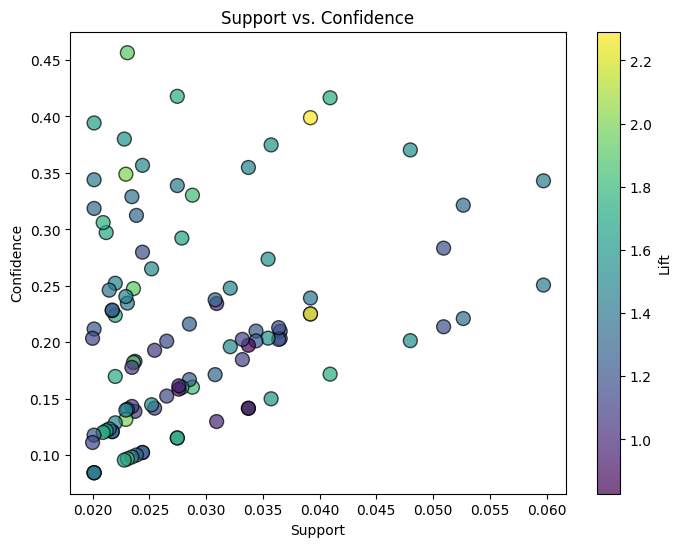

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(rules['support'], rules['confidence'], c=rules['lift'], cmap='viridis', s=100, edgecolors="k",alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Support vs. Confidence')
plt.show()